### Preliminaries for running on Deucalion

In [1]:
import sys
sys.path.append("./modules")
import os
os.environ[ 'MPLCONFIGDIR' ] = '/home/alindote/.cache/matplotlib'
#print(os.environ.get('MPLCONFIGDIR'))

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
### matplotlib configuration
#%matplotlib inline 
#%config InlineBackend.figure_format = 'retina'

In [3]:
%matplotlib inline 
plt.set_cmap('viridis')
matplotlib.rc('font', size=22) 
matplotlib.rc('legend', fontsize=18)    # legend fontsize
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
matplotlib.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rcParams['figure.figsize'] = (12., 9.)    # ... and big plots


float_formatter = "{:.2e}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

colors, linestyles = ['red', 'blue', 'green', 'purple', 'magenta', 'cyan', 'yellow', 'orange'], ['-', ':', '--', '-.', '-', ':', '--', '-.']
colors_Labs = ['lime', 'darkgreen', 'royalblue', 'darkviolet', 'crimson']
font_large = 24

<Figure size 640x480 with 0 Axes>

## Create Isotope Comparison Plot

### Relevant references
* Agostini M. et al., "Towards the discovery of matter creation with neutrinoless double-beta decay", Rev. Mod. Phys. 95, 025002 (2023), arXiv:2202.01787, https://doi.org/10.1103/RevModPhys.95.025002
* J. Kotila and F. Iachello, "Phase-space factors for double-𝛽 decay", Phys. Rev. C 85, 034316, https://doi.org/10.1103/PhysRevC.85.034316
* L. Pertoldi (LEGEND Collaboration), "The first year of LEGEND-200 physics data in the quest for 0𝜈𝛽𝛽", Neutrino 2024, Milano, 18 June 2024, https://zenodo.org/records/12706010
* LEGEND Collaboration, "LEGEND-1000 Preconceptual Design Report", arXiv:2107.11462
* XLZD Collaboration, "Neutrinoless Double Beta Decay Sensitivity of the XLZD Rare Event Observatory", 	J. Phys. G: Nucl. Part. Phys. 52 (2025) 045102, arXiv:2410.19016, https://doi.org/10.1088/1361-6471/adb900
* S. Abe et al. (KamLAND-Zen Collaboration), "Search for Majorana Neutrinos with the Complete KamLAND-Zen Dataset", arXiv:2406.11438
* A. Abdukerim et al. (PandaX Collaboration), "PandaX-xT – a Deep Underground Multi-ten-tonne Liquid Xenon Observatory", Sci. China Phys. Mech. Astron. 68 (2025) 221011, arXiv:2402.03596

  
### Experimental half-lifes (90% CL)
* KamLAND-Zen (limit): **3.8x10$^{26}$ yr**
* KamLAND2-Zen (projection): **2x10$^{27}$ yr**
* LEGEND-200 + GERDA + MjD(combined limit): **1.9x10$^{26}$ yr**
* LEGEND-1000 (projection): **1.8x10$^{28}$ yr**
* nEXO (projection): **1.35x10$^{28}$ yr**
* XLZD (80 t projection): **1.3x10$^{28}$ yr**
* XLZD (requirement #1): **7x10$^{27}$ yr**
* XLZD (requirement #2): **1.0x10$^{28}$ yr**
* PandaX-xT (baseline): **3.3x10$^{27}$ yr**
* PandaX-xT (optimistic): **6.9x10$^{27}$ yr**

### Phase space factors
* 76Ge: **2.36x10$^{-15}$ /yr**
* 100Mo: **15.92x10$^{-15}$ /yr**
* 130Te: **14.22x10$^{-15}$ /yr**
* 136Xe: **14.58x10$^{-15}$ /yr**

### Classical NMEs
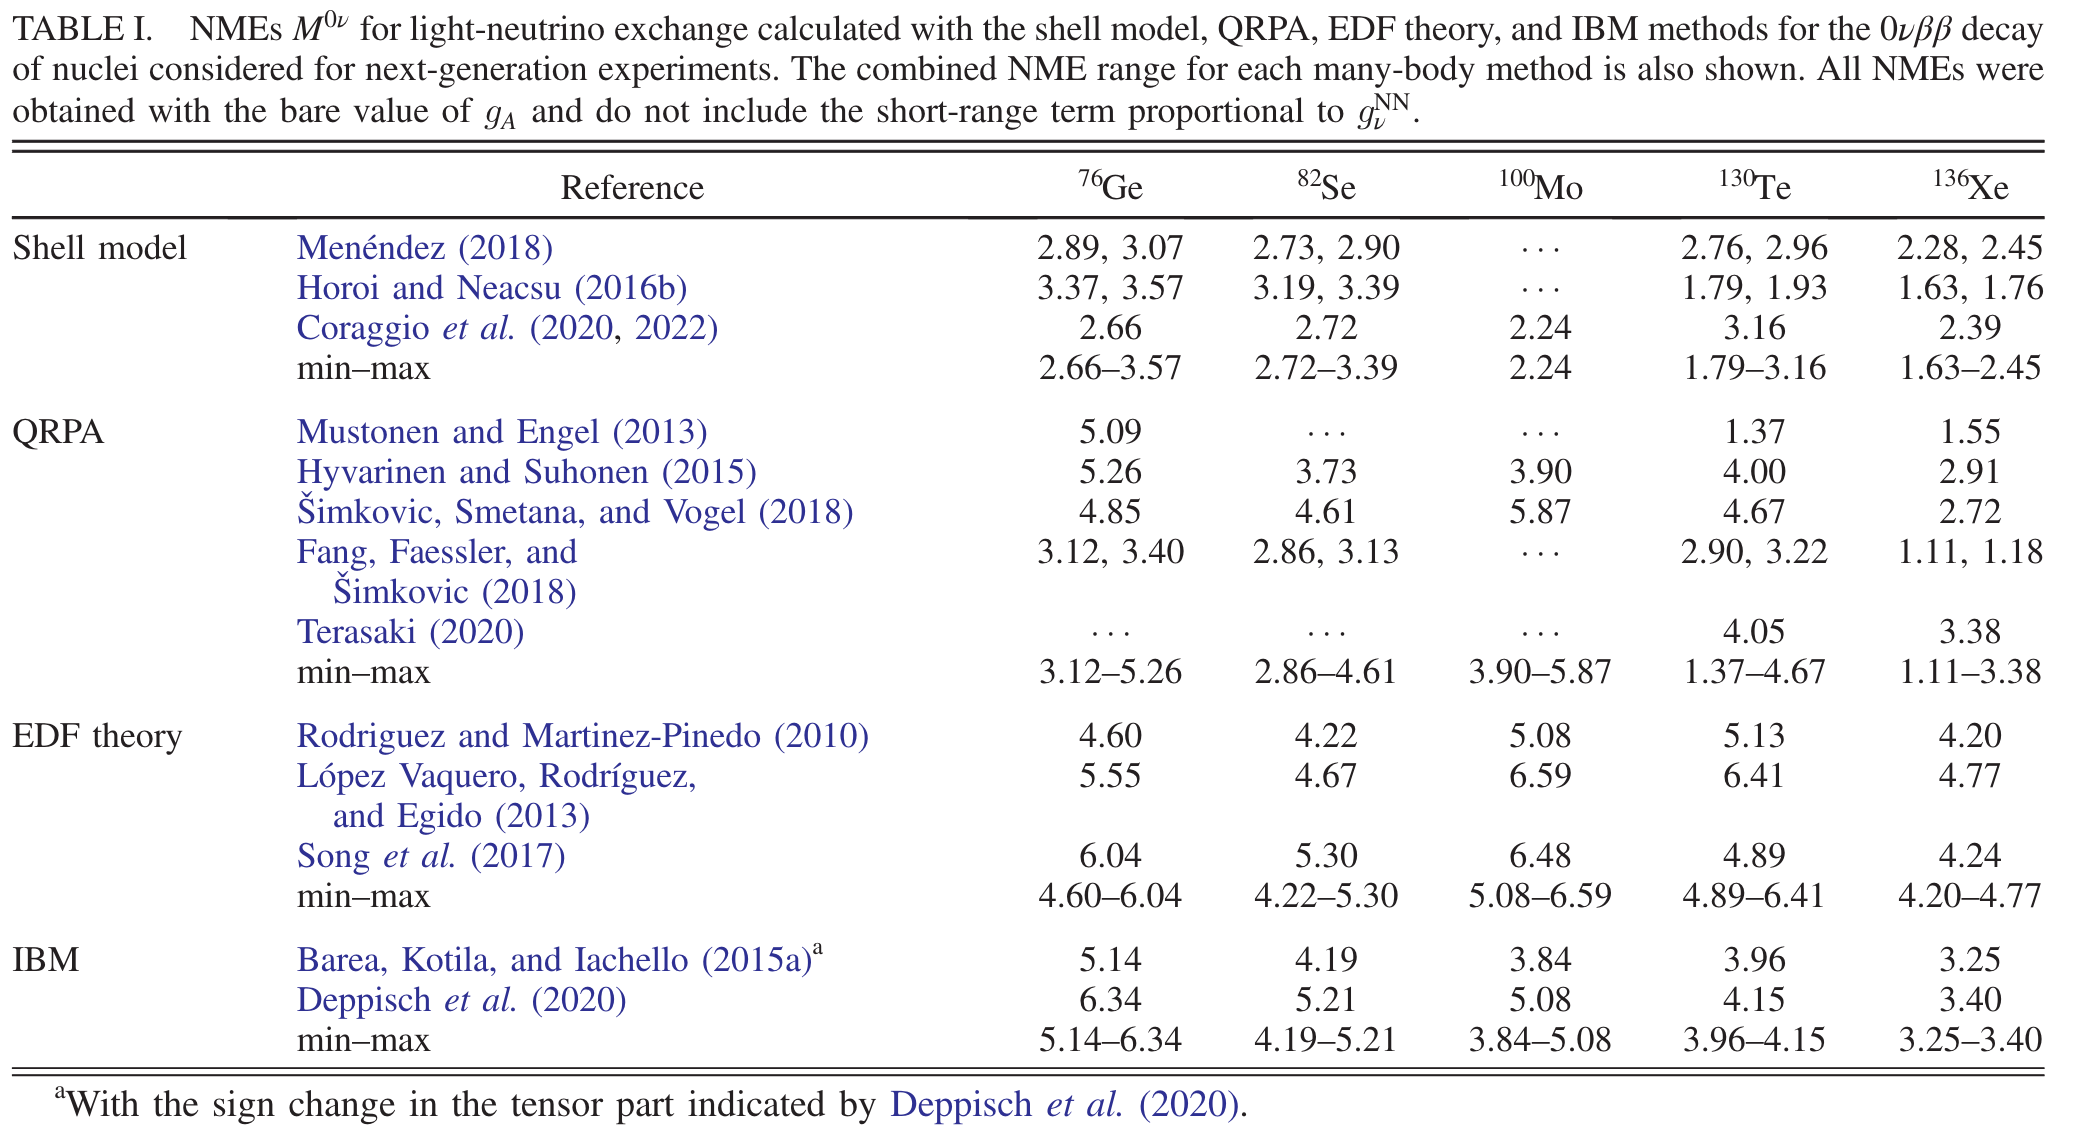

### Auxiliary function to convert HL to m_bb

In [7]:
def m_bb(T_half, M_0nu, G_0nu = phaseSpaceFactor_Xe):
    m_e = 511e6 # electron mass, in meV
    return [ m_e / np.sqrt(G_0nu * T_half * M**2) / gA**2 for M in M_0nu]

### Parameters

In [5]:
gA = 1.27 # Axial vector weak coupling constant

# Phase space factors, in /yr
phaseSpaceFactor_Ge = 2.363e-15
phaseSpaceFactor_Mo = 15.92e-15
phaseSpaceFactor_Te = 14.22e-15 
phaseSpaceFactor_Xe = 14.58e-15

# NME ranges (from Agostini et al., see above)
NMEs_Ge = [2.66, 6.34]
NMEs_Mo = [2.24, 6.59]
NMEs_Te = [1.37, 6.41]
NMEs_Xe = [1.11, 4.77]


### HL limits and projections

In [23]:
# Limits
HL_KLZ = 3.8e26
HL_LG200 = 1.9e26
HL_CUORE = 3.8e25

# Projections
HL_LG200_proj = 1e27
HL_LG1000 = 1.6e28
HL_KL2Z = 2e27
HL_nEXO = 1.35e28
HL_PX_bl = 3.3e27
HL_PX_op = 6.9e27
HL_SNO = 1.7e27
HL_CUPID = 1.8e27
HL_XLZD_req1 = 7e27
HL_XLZD_req2 = 1e28
HL_XLZD_80t = 1.3e28
HL_XLZD_ideal = 1.7e28

### Make the plot

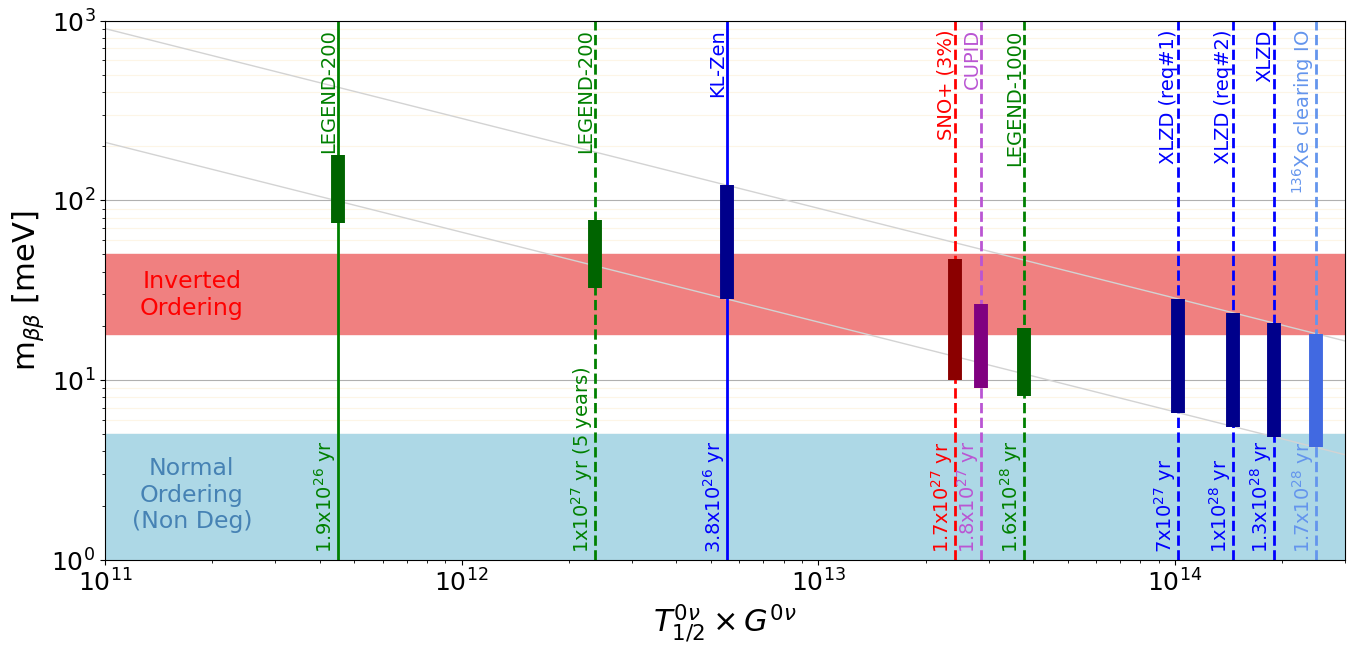

In [29]:
fig, ax = plt.subplots(figsize = (16, 7))

# m_bb range to use
mbb = [1, 1000]
TG = [1e11, 3e14]

plt.xlabel(r'$T_{1/2}^{0\nu} \times G^{0\nu}$')
plt.xscale('log')
plt.xlim(TG)
plt.ylabel(r'm$_{\beta\beta}$ [meV]')
plt.yscale('log')
plt.ylim(mbb)

plt.grid(axis = 'y', which = 'major')
plt.grid(axis = 'y', which = 'minor', color = 'oldlace')

# Add IO and NO bands
# For NO only the lower neutrino mass region (non degenerate)
plt.fill_between([1e11,1e15], 18, 50, color = 'lightcoral', zorder=2)
plt.text(1.75e11, 30, "Inverted\nOrdering", va = "center", ha = "center",color = "red", size = 17, rotation = 0)
plt.fill_between([1e11,1e15], 5, color = 'lightblue', zorder=2)
plt.text(1.75e11, 2.3, "Normal\nOrdering\n(Non Deg)", va = "center", ha = "center",color = "steelblue", size = 17, rotation = 0)

## Add lines showing the dependence between m_bb and G*T_1/2
x = np.array(TG)
mbb_line_min = electronMass/(gA**2*NMEs_Xe[0])*1/np.sqrt(x)
mbb_line_max = electronMass/(gA**2*NMEs_Xe[1])*1/np.sqrt(x)
plt.plot(TG, mbb_line_min, lw = 1, color = 'lightgray')
plt.plot(TG, mbb_line_max, lw = 1, color = 'lightgray')

## First the limit measurements
# KamLAND-Zen
TG_KLZ = HL_KLZ*phaseSpaceFactor_Xe
mbb_KLZ = m_bb(HL_KLZ, NMEs_Xe)
plt.vlines(TG_KLZ, mbb[0], mbb[1], lw = 2, ls = '-', color = "blue")
plt.text(TG_KLZ, mbb[1]*0.9, r"KL-Zen", va = "top", ha = "right",color = "blue", size = 14, rotation = 90)
plt.text(TG_KLZ, mbb[0]*1.1, r"3.8x10$^{26}$ yr", va = "bottom", ha = "right",color = "blue", size = 14, rotation = 90)
plt.vlines(TG_KLZ, mbb_KLZ[0], mbb_KLZ[1], lw = 10, ls = '-', color = 'darkblue')

# LEGEND-200
TG_LG200 = HL_LG200*phaseSpaceFactor_Ge
mbb_LG200 = m_bb(HL_LG200, NMEs_Ge, phaseSpaceFactor_Ge)
plt.vlines(TG_LG200, mbb[0], mbb[1], lw = 2, ls = '-', color = "green")
plt.text(TG_LG200, mbb[1]*0.9, r"LEGEND-200", va = "top", ha = "right",color = "green", size = 14, rotation = 90)
plt.text(TG_LG200, mbb[0]*1.1, r"1.9x10$^{26}$ yr", va = "bottom", ha = "right",color = "green", size = 14, rotation = 90)
plt.vlines(TG_LG200, mbb_LG200[0], mbb_LG200[1], lw = 10, ls = '-', color = 'darkgreen')


## Now the projections
# KamLAND2-Zen
#TG_KL2Z = HL_KL2Z*phaseSpaceFactor_Xe
#mbb_KL2Z = m_bb(HL_KL2Z, NMEs_Xe)
#plt.vlines(TG_KL2Z, mbb[0], mbb[1], lw = 2, ls = '--', color = "blue")
#plt.text(TG_KL2Z, mbb[1]*0.9, r"KL2-Zen", va = "top", ha = "right",color = "blue", size = 14, rotation = 90)
#plt.text(TG_KL2Z, mbb[0]*1.1, r"2x10$^{27}$ yr", va = "bottom", ha = "right",color = "blue", size = 14, rotation = 90)
#plt.vlines(TG_KL2Z, mbb_KL2Z[0], mbb_KL2Z[1], lw = 10, ls = '-', color = 'darkblue')

# LEGEND-200
TG_LG200_proj = HL_LG200_proj*phaseSpaceFactor_Ge
mbb_LG200_proj = m_bb(HL_LG200_proj, NMEs_Ge, phaseSpaceFactor_Ge)
plt.vlines(TG_LG200_proj, mbb[0], mbb[1], lw = 2, ls = '--', color = "green")
plt.text(TG_LG200_proj, mbb[1]*0.9, r"LEGEND-200", va = "top", ha = "right",color = "green", size = 14, rotation = 90)
plt.text(TG_LG200_proj, mbb[0]*1.1, r"1x10$^{27}$ yr (5 years)", va = "bottom", ha = "right",color = "green", size = 14, rotation = 90)
plt.vlines(TG_LG200_proj, mbb_LG200_proj[0], mbb_LG200_proj[1], lw = 10, ls = '-', color = 'darkgreen')

# LEGEND-1000
TG_LG1000 = HL_LG1000*phaseSpaceFactor_Ge
mbb_LG1000 = m_bb(HL_LG1000, NMEs_Ge, phaseSpaceFactor_Ge)
plt.vlines(TG_LG1000, mbb[0], mbb[1], lw = 2, ls = '--', color = "green")
plt.text(TG_LG1000, mbb[1]*0.9, r"LEGEND-1000", va = "top", ha = "right",color = "green", size = 14, rotation = 90)
plt.text(TG_LG1000, mbb[0]*1.1, r"1.6x10$^{28}$ yr", va = "bottom", ha = "right",color = "green", size = 14, rotation = 90)
plt.vlines(TG_LG1000, mbb_LG1000[0], mbb_LG1000[1], lw = 10, ls = '-', color = 'darkgreen')

# CUPID
TG_CUPID = HL_CUPID*phaseSpaceFactor_Mo
mbb_CUPID = m_bb(HL_CUPID, NMEs_Mo, phaseSpaceFactor_Mo)
plt.vlines(TG_CUPID, mbb[0], mbb[1], lw = 2, ls = '--', color = "mediumorchid")
plt.text(TG_CUPID, mbb[1]*0.9, r"CUPID", va = "top", ha = "right",color = "mediumorchid", size = 14, rotation = 90)
plt.text(TG_CUPID, mbb[0]*1.1, r"1.8x10$^{27}$ yr", va = "bottom", ha = "right",color = "mediumorchid", size = 14, rotation = 90)
plt.vlines(TG_CUPID, mbb_CUPID[0], mbb_CUPID[1], lw = 10, ls = '-', color = 'purple')

# SNO+
TG_SNO = HL_SNO*phaseSpaceFactor_Te
mbb_SNO = m_bb(HL_SNO, NMEs_Te, phaseSpaceFactor_Te)
plt.vlines(TG_SNO, mbb[0], mbb[1], lw = 2, ls = '--', color = "red")
plt.text(TG_SNO, mbb[1]*0.9, r"SNO+ (3%)", va = "top", ha = "right",color = "red", size = 14, rotation = 90)
plt.text(TG_SNO, mbb[0]*1.1, r"1.7x10$^{27}$ yr", va = "bottom", ha = "right",color = "red", size = 14, rotation = 90)
plt.vlines(TG_SNO, mbb_SNO[0], mbb_SNO[1], lw = 10, ls = '-', color = 'darkred')

# XLZD -- requirement #1 (7x10^27)
TG_XLZD_req1 = HL_XLZD_req1*phaseSpaceFactor_Xe
mbb_XLZD_req1 = m_bb(HL_XLZD_req1, NMEs_Xe)
plt.vlines(TG_XLZD_req1, mbb[0], mbb[1], lw = 2, ls = '--', color = "blue")
plt.text(TG_XLZD_req1, mbb[1]*0.9, r"XLZD (req#1)", va = "top", ha = "right",color = "blue", size = 14, rotation = 90)
plt.text(TG_XLZD_req1, mbb[0]*1.1, r"7x10$^{27}$ yr", va = "bottom", ha = "right",color = "blue", size = 14, rotation = 90)
plt.vlines(TG_XLZD_req1, mbb_XLZD_req1[0], mbb_XLZD_req1[1], lw = 10, ls = '-', color = 'darkblue')

# XLZD -- requirement #2 (1x10^28)
TG_XLZD_req2 = HL_XLZD_req2*phaseSpaceFactor_Xe
mbb_XLZD_req2 = m_bb(HL_XLZD_req2, NMEs_Xe)
plt.vlines(TG_XLZD_req2, mbb[0], mbb[1], lw = 2, ls = '--', color = "blue")
plt.text(TG_XLZD_req2, mbb[1]*0.9, r"XLZD (req#2)", va = "top", ha = "right",color = "blue", size = 14, rotation = 90)
plt.text(TG_XLZD_req2, mbb[0]*1.1, r"1x10$^{28}$ yr", va = "bottom", ha = "right",color = "blue", size = 14, rotation = 90)
plt.vlines(TG_XLZD_req2, mbb_XLZD_req2[0], mbb_XLZD_req2[1], lw = 10, ls = '-', color = 'darkblue')

# XLZD -- 80 t, optimistic
TG_XLZD_80t = HL_XLZD_80t*phaseSpaceFactor_Xe
mbb_XLZD_80t = m_bb(HL_XLZD_80t, NMEs_Xe)
plt.vlines(TG_XLZD_80t, mbb[0], mbb[1], lw = 2, ls = '--', color = "blue")
plt.text(TG_XLZD_80t, mbb[1]*0.9, r"XLZD", va = "top", ha = "right",color = "blue", size = 14, rotation = 90)
plt.text(TG_XLZD_80t, mbb[0]*1.1, r"1.3x10$^{28}$ yr", va = "bottom", ha = "right",color = "blue", size = 14, rotation = 90)
plt.vlines(TG_XLZD_80t, mbb_XLZD_80t[0], mbb_XLZD_80t[1], lw = 10, ls = '-', color = 'darkblue')

# XLZD -- ideal (what would it take to clear the IO)
TG_XLZD_ideal = HL_XLZD_ideal*phaseSpaceFactor_Xe
mbb_XLZD_ideal = m_bb(HL_XLZD_ideal, NMEs_Xe)
plt.vlines(TG_XLZD_ideal, mbb[0], mbb[1], lw = 2, ls = '--', color = "cornflowerblue")
plt.text(TG_XLZD_ideal, mbb[1]*0.9, r"$^{136}$Xe clearing IO", va = "top", ha = "right",color = "cornflowerblue", size = 14, rotation = 90)
plt.text(TG_XLZD_ideal, mbb[0]*1.1, r"1.7x10$^{28}$ yr", va = "bottom", ha = "right",color = "cornflowerblue", size = 14, rotation = 90)
plt.vlines(TG_XLZD_ideal, mbb_XLZD_ideal[0], mbb_XLZD_ideal[1], lw = 10, ls = '-', color = 'royalblue')

plt.show()